In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from scipy import spatial
import seaborn as sns

In [7]:
class dbscan_scikit_post_visualization:
    def __init__(self, docs2vec_filepath, ndims):
        self.__column_names = list(range(ndims))
        # DataFrame containing features with index name 'Index'
        self.__df_original = pd.read_csv(docs2vec_filepath, names = ['Index'] + self.__column_names, header=None)
        self.__df = self.__df_original.drop(['Index'], axis = 1)
        
        # No of dims in input
        self.__ndim = ndims
        
        # Find Principal Components for visualization
        self.__pca()
        
        # Random Samples
        self.__random_samples = np.random.choice(self.__df.shape[0], 1000, replace=False)
        
        # Visualization Parameter Set
        sns.set(rc={'figure.figsize':(6,4)})
        
        #print(self.__df.head())
        
    def __pca(self):
        # Decomposition for visualization
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(self.__df)
        print('Variation Ratio: ', pca.explained_variance_ratio_)
        self.__principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    
    def __read_label(self, label_filepath):
        # Read post-processed data from file
        labels = pd.read_csv(label_filepath, names = ['Index', 'label'], header = None)
        self.__labels = labels.drop(['Index'], axis = 1)
        #labels.head()
        self.__principalDf['label'] = self.__labels['label']
        
    def __visualize_count(self):
        # Visualize data count distribution in each cluster
        ax = sns.countplot(self.__principalDf['label'])
        ax.set_xlabel('Cluster #', fontsize = 20)
        ax.set_ylabel('# Documents', fontsize = 20)
        ax.set_title('DBSCAN Clustering: \n' + self.__label_filepath, fontsize = 20)
        
    def __visualize_cluster(self):
        # Visualize data
        principalDf_sample = self.__principalDf.iloc[self.__random_samples,]
        lm = sns.lmplot(data=principalDf_sample, x='principal component 1', y='principal component 2', hue='label', 
                           fit_reg=False, legend=False, legend_out=True)
        plt.xlabel('principal component 1', fontsize = 20)
        plt.ylabel('principal component 2', fontsize = 20)
        plt.title('Data Post-Visualization\n' + self.__label_filepath , fontsize = 20)
        plt.xlim((-0.04, 0.02))
        plt.ylim((-0.04, 0.06))
    
    def visualize_result(self, label_filepath):
        self.__label_filepath = label_filepath
        self.__read_label(label_filepath)
        self.__visualize_count()
        self.__visualize_cluster()
        
    def calc_SSE(self):
        # Calculate SSE based on euclidean distance 
        SSE = 0
        df_final = self.__df
        df_final['label'] = self.__labels['label']
        clusters_df = df_final.groupby('label')

        i = 0
        for label_, df_ in clusters_df:
            # Skipping Noise Point at first cluster
            if (i == 0):
                i += 1
                continue
            #print('Cluster ', i)
            df_ = df_.drop(['label'], axis = 1)
            #print(df_.shape)
            center_ = df_.mean(axis = 0).to_frame().T
            #print(center_)
            ary_ = spatial.distance.cdist(df_.iloc[:,0:], center_, metric='euclidean')
            sse = ary_.sum()
            #print('sse: ', sse)
            SSE += sse
            i += 1
            
        return SSE

obj = dbscan_scikit_post_visualization('docs_vector.csv', 300)

Variation Ratio:  [0.62275064 0.06916105]


In [8]:
label_dir = './Labels_DBSCAN/'

./Labels_DBSCAN/Label_4_0.03.csv
SSE =  704.9504419548043
./Labels_DBSCAN/Label_4_0.05.csv
SSE =  1587.3101861355901


Text(0.5,1,'SSE Profile with minPts = 4')

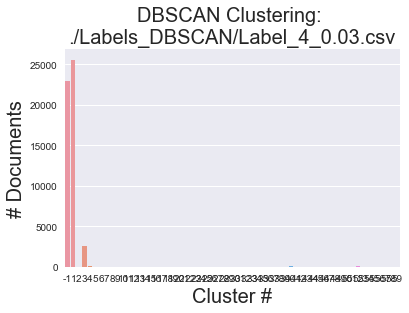

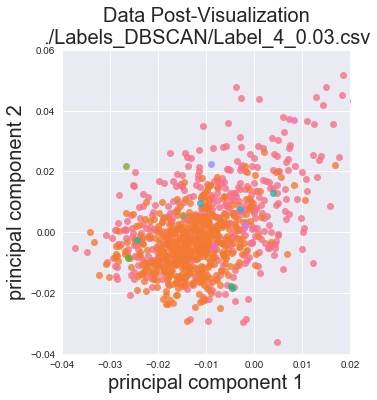

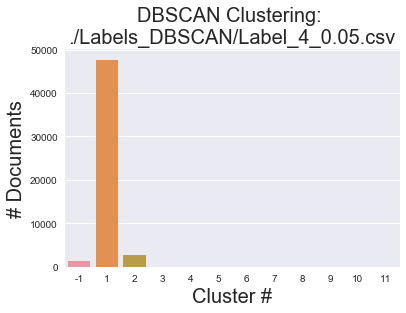

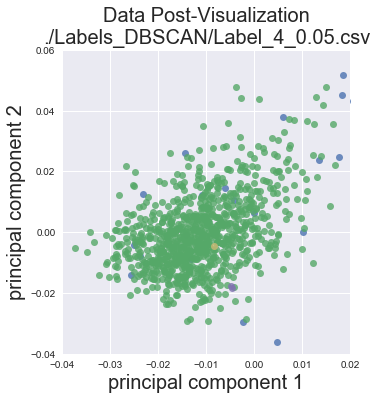

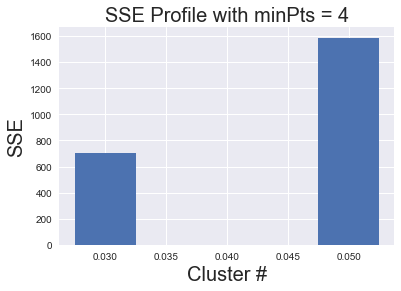

In [12]:
minPts = 4
eps_list = [0.03, 0.05]

SSE_dict = {}
for eps in eps_list:
    filename = label_dir + 'Label_' + str(minPts) + '_' + str(eps) + '.csv'
    print(filename)
    plt.figure()
    obj.visualize_result(filename)
    sse = obj.calc_SSE()
    print('SSE = ', sse)
    SSE_dict[eps] = sse

plt.figure()
plt.bar(SSE_dict.keys(), SSE_dict.values(), width = 0.005)
plt.xlabel('Cluster #', fontsize = 20)
plt.ylabel('SSE', fontsize = 20)
plt.title('SSE Profile with minPts = ' + str(minPts), fontsize = 20)


./Labels_DBSCAN/Label_10_0.03.csv
SSE =  632.7164383169593
./Labels_DBSCAN/Label_10_0.05.csv
SSE =  1582.6837433356586


Text(0.5,1,'SSE Profile with minPts = 10')

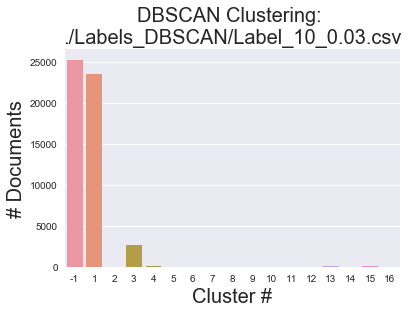

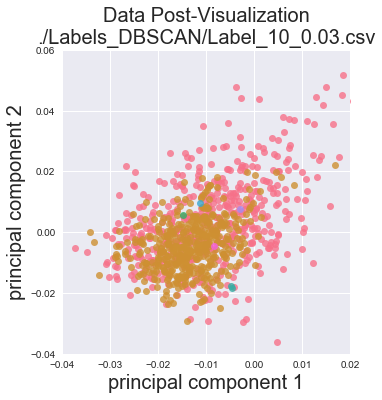

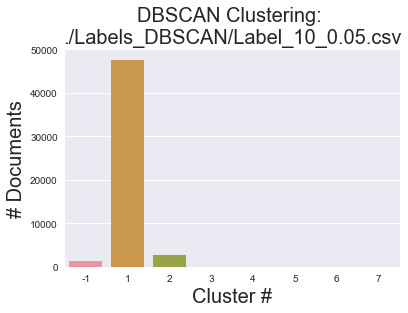

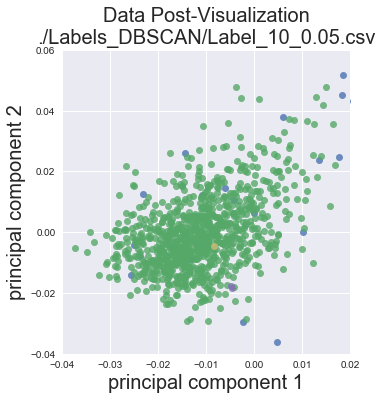

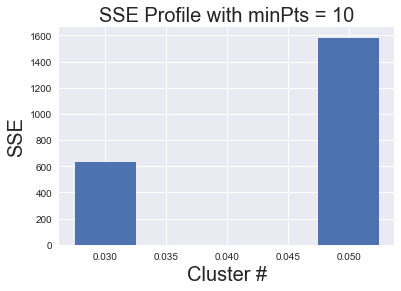

In [16]:
minPts = 10
eps_list = [0.03, 0.05]

SSE_dict = {}
for eps in eps_list:
    filename = label_dir + 'Label_' + str(minPts) + '_' + str(eps) + '.csv'
    print(filename)
    plt.figure()
    obj.visualize_result(filename)
    sse = obj.calc_SSE()
    print('SSE = ', sse)
    SSE_dict[eps] = sse

plt.figure()
plt.bar(SSE_dict.keys(), SSE_dict.values(), width = 0.005)
plt.xlabel('Cluster #', fontsize = 20)
plt.ylabel('SSE', fontsize = 20)
plt.title('SSE Profile with minPts = ' + str(minPts), fontsize = 20)